In [1]:
# Import necessary libraries
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Import the cleaned merged dataframe from Part 3 (joining_data notebook)
data = pd.read_csv('/Users/kthan/Desktop/LHL-Python/Python-Project/data/merged_data_cleaned.csv')

In [6]:
# Check to ensure dataframe was properly imported
data.head(3)

,Station Name,Restaurant Name,Number of Bikes,Distance,Rating,Number of Reviews
0,Queen St E / Woodward Ave,Jaclyn's,7,172.375134,4.5,16
1,Queen St E / Woodward Ave,Lake Inez,7,794.661955,4.5,94
2,Queen St E / Woodward Ave,Casa Di Giorgios,7,408.715725,4.0,75


# Build a regression model. <br>
Goal: To investigate the relationship between the 'Number of Bikes' and the characteristics of the restaurants in that location.
* Dependent Variable is the 'Number of Bikes'
* Independent Variables are 'Distance', 'Rating' and 'Number of Reviews' 
* Using a linear regression model, we will be testing the following hypotheses: 
    * H<sub>a</sub>: there is a relationship between the 'Number of Bikes' and the characteristics of the surrounding restaurants
    * H<sub>0</sub>: there is no relationship between the independent and dependent variables

## Linear Regression Model

In [7]:
# Define the y and X variables
y = data[['Number of Bikes']]
X = data[['Distance','Rating','Number of Reviews']]

In [8]:
# MinMaxScaler is used to scale the X variables to ensure an 'apples to apples' comparison
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head(2)

,Distance,Rating,Number of Reviews
0,0.122437,0.9,0.004604
1,0.568398,0.9,0.027050


In [9]:
# Add a constant which is a column of 1s so the model will contain an intercept
X_scaled_constant = sm.add_constant(X_scaled)
X_scaled_constant.head(2)

,const,Distance,Rating,Number of Reviews
0,1.0,0.122437,0.9,0.004604
1,1.0,0.568398,0.9,0.027050


In [10]:
# Run Regression on defined y and X variables above
regression = sm.OLS(y, X_scaled_constant) 
model = regression.fit()
result = model.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     17.03
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.85e-11
Time:                        15:45:17   Log-Likelihood:                -69897.
No. Observations:               20741   AIC:                         1.398e+05
Df Residuals:                   20737   BIC:                         1.398e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.1829      0.22

### Provide an interpretation of the results. 
- **R-squared/Adj. R-squared**: Both results are 0.002 which indicates that 0.2% of the variance in the target variable (Number of Bikes) can be explained by the independent variables (Distance, Rating and Number of Reviews).
- **P>|t|**: All p-values are less than 0.05 which indicates that each independent variable is statistically significant. Therefore, each independent variable does impact the 'Number of Bikes' and backwards elimination is not required.
- Despite having statistically significant p-values, the model is not effective at explaining the patterns in the data.

### Residual plots
Many linear regression assumptions can be examined by looking at the residuals; we will test the Normality and Homoscedasticity.

In [ ]:
# Extract the residuals data from the fit model by using the attribute 'resid'
residuals = model.resid
print(residuals)

0       -0.767191
1       -1.364546
2       -1.046228
3       -0.904206
4       -1.360799
           ...   
20736   -2.823146
20737   -2.792683
20738   -2.696005
20739   -2.872018
20740   -2.437242
Length: 20741, dtype: float64


#### Normality
* The null hypothesis states that the data is drawn from a normal distribution. <br>
* Using the residuals, the normality assumption will be checked via a histogram and the Shapiro-Wilk Test.
* The results from the tests below indicate that data is not drawn from a normal distribution and we should reject the null hypothesis.

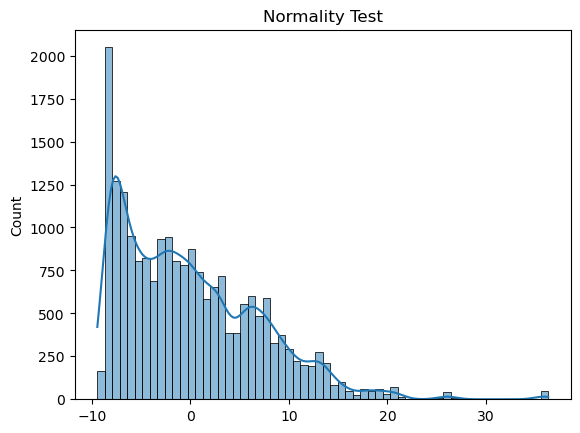

<Figure size 640x480 with 0 Axes>

In [23]:
# Test normality using a histogram
histogram_residuals = sns.histplot(data=residuals, kde=True).set(title='Normality Test')
plt.show()

# Save plot in images folder to present to stakeholders
plt.savefig('/Users/kthan/Desktop/LHL-Python/Python-Project/images/histogram_residuals.png')

In [26]:
# Test normality using the Shapiro-Wilk Test
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9207689166069031, pvalue=0.0)

#### Homoscedasticity
* The null hypothesis states that homoscedasticity is present (the residuals are distributed with equal variance). <br>
* We can visually check the homoscedasticity assumption by plotting the residuals vs the 'Number of Bikes'. <br>
* The results from the scatterplot below indicate that homoscedasticity is not present as the residuals are not distributed with equal variance therefore, we should reject the null hypothesis.

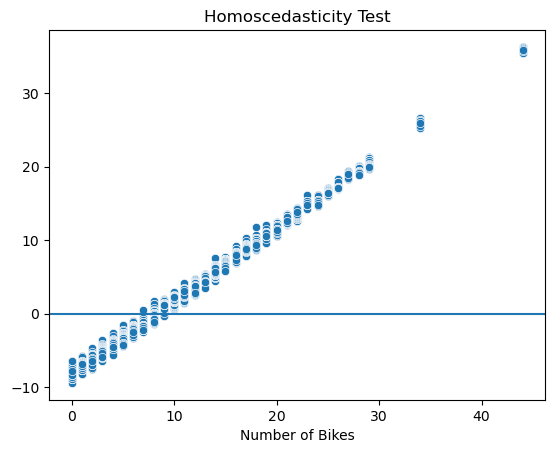

In [18]:
# Test homoscedasticity using a scatter plot
ax = sns.scatterplot(x=data['Number of Bikes'], y=residuals)
ax.set(title='Homoscedasticity Test') # inserts title
ax.axhline(0) # inserts horizontal line at 0


# Save plot in images folder to present to stakeholders
plt.savefig('/Users/kthan/Desktop/LHL-Python/Python-Project/images/scatterplot_residuals.png')

### Conclusions
* Based on the model and residual plots, we can reject the null hypothesis however, the data does not provide sufficient evidence to accept the alternative hypothesis. Despite the statistically significant p-values, the low Adj. R-Squared (0.2%) means that we cannot use the model to predict future trends or outcomes. Further exploration is required before the alternative hypothesis can be accepted.
* If given more time, improvements to the model would include:
    * Feature Selection: adding more independent variables to the model
    * Feature Encoding: converting qualitative variables to a quantitative values (e.g. price)
    * Feature Engineering: manipulating variables in the dataset to use as features in the model (e.g. Avg Rating, Avg Distance or Number of Restaurants)
* Although the model doesn’t have predictive power, the data itself yields interesting prescriptive insights for tourists/locals in Toronto. For example:
    * The data can return the average restaurant rating within 1,000 meters of a specified bike station. As a result, the users of the data can select/avoid bike stations according to the likelihood of finding a good restaurant nearby. 
    * The data can find the top restaurants in Toronto according to their rating and number of reviews which would help users with choosing a highly rated and reviewed restaurant.
    * The data indicates that most bike stations have 0 bikes available which indicates that city bike users should research their chosen bike station to ensure there will be a bike available for use.
